<a href="https://colab.research.google.com/github/sathamhussain7/ML-algorithms/blob/main/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SalaryPrediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/salary.csv')

In [ ]:
df.head()

,salary,gender,departm,years,age,publications
0,86285,0,bio,26.0,64.0,72
1,77125,0,bio,28.0,58.0,43
2,71922,0,bio,10.0,38.0,23
3,70499,0,bio,16.0,46.0,64
4,66624,0,bio,11.0,41.0,23


In [ ]:
df['departm'].value_counts()

bio        16
neuro      15
stat       15
chem       11
physics     8
math        8
geol        4
Name: departm, dtype: int64

In [ ]:
df.shape

(77, 6)

In [ ]:
df.isnull().sum()

salary          0
gender          0
departm         0
years           1
age             1
publications    0
dtype: int64

In [ ]:
df.dtypes

salary            int64
gender            int64
departm          object
years           float64
age             float64
publications      int64
dtype: object

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())

In [ ]:
df['years'] = df['years'].fillna(df['years'].mean())

In [ ]:
df.isnull().sum()

salary          0
gender          0
departm         0
years           0
age             0
publications    0
dtype: int64

In [ ]:
df.dtypes

salary            int64
gender            int64
departm          object
years           float64
age             float64
publications      int64
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,salary,gender,years,age,publications
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,67748.519481,0.142857,14.973684,45.486842,21.831169
std,15100.581435,0.387783,8.560887,8.946469,15.240530
min,44687.000000,0.000000,1.000000,31.000000,3.000000
25%,57185.000000,0.000000,8.000000,38.000000,9.000000
50%,62607.000000,0.000000,14.000000,44.000000,19.000000
75%,75382.000000,0.000000,23.000000,53.000000,33.000000
max,112800.000000,2.000000,34.000000,65.000000,72.000000


In [ ]:
feature=['salary','years',	'age',	'publications']
for i in feature:
 iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
 upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
 lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)

 print('feature:',i)
 print('iqr :',iqr)
 print('upper_threshold : ',upper_threshold)
 print('lower_threshold :',lower_threshold)
 
 if upper_threshold > df[i].max():
  print('No outlier in upper_threshold ')
 else:
  print('outlier in upper_threshold')
 if lower_threshold< df[i].min():
   print('No outlier in lower_threshold ')
 else:
  print('outlier in lower_threshold')
 print()

feature: salary
iqr : 18197.0
upper_threshold :  102677.5
lower_threshold : 29889.5
outlier in upper_threshold
No outlier in lower_threshold 

feature: years
iqr : 15.0
upper_threshold :  45.5
lower_threshold : -14.5
No outlier in upper_threshold 
No outlier in lower_threshold 

feature: age
iqr : 15.0
upper_threshold :  75.5
lower_threshold : 15.5
No outlier in upper_threshold 
No outlier in lower_threshold 

feature: publications
iqr : 24.0
upper_threshold :  69.0
lower_threshold : -27.0
outlier in upper_threshold
No outlier in lower_threshold 



In [ ]:
df.gender.value_counts()

0    67
1     9
2     1
Name: gender, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['departm'])

In [ ]:
df.groupby('gender')['salary'].mean()

gender
0    69576.746269
1    55719.666667
2    53517.000000
Name: salary, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

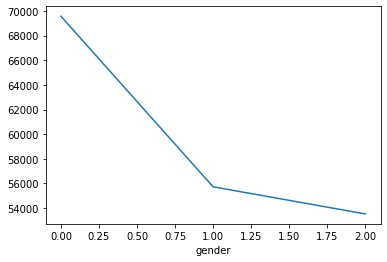

In [ ]:
df.groupby('gender')['salary'].mean().plot()
plt.show

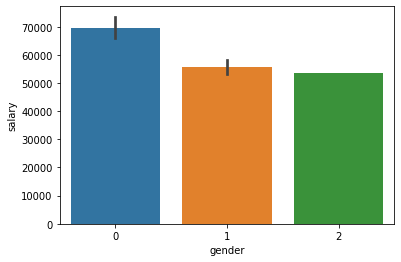

In [ ]:
sns.barplot(x='gender',y='salary',data=df)
plt.show()

In [ ]:
df[['gender','salary']].corr()

,gender,salary
gender,1.000000,-0.307216
salary,-0.307216,1.000000


In [ ]:
# sns.barplot(x='departm',y='salary',data=df)
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

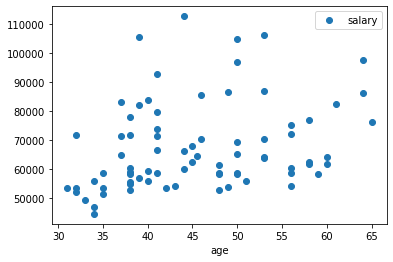

In [ ]:
df.plot(x='age',y='salary',style='o') 
plt.show

In [ ]:
df[['age','salary']].corr()

,age,salary
age,1.000000,0.290415
salary,0.290415,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

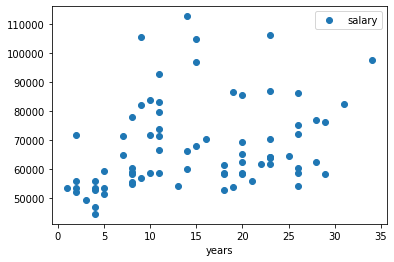

In [ ]:
df.plot(x='years',y='salary',style='o') 
plt.show

In [ ]:
df[['years','salary']].corr()

,years,salary
years,1.000000,0.295177
salary,0.295177,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

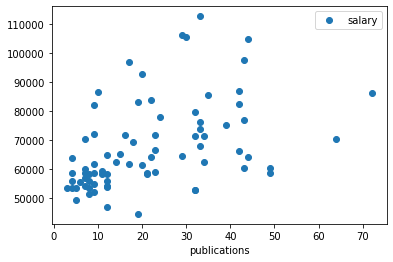

In [ ]:
df.plot(x='publications',y='salary',style='o') 
plt.show

In [ ]:
df[['publications','salary']].corr()

,publications,salary
publications,1.000000,0.457314
salary,0.457314,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X=df[['gender','years','age','publications']]
#X=df.loc[:,df.columns[1:]]
y=df['salary']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
lr.coef_

array([-2725.87199407,  1817.33174343,  -771.85320011,  4944.54429317])

In [ ]:
lr.intercept_

66927.39344262295

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.37943371087502464

In [ ]:
lr.score(X_test,y_test)

0.37943371087502464

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knc=KNeighborsRegressor(4)
knc.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
knc.score(X_test,y_test)

-0.06308070614424621

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40]:
  knc=KNeighborsRegressor(i)
  knc.fit(X_train, y_train)
  trainAccuracy = r2_score(y_train, knc.predict(X_train))
  val=cross_val_score(knc,X_train,y_train,cv=10, scoring=make_scorer(r2_score))
  print('k:',i ,'train score:',trainAccuracy, 'cv score:',np.mean(val))

k: 1 train score: 0.9949557042468656 cv score: 0.016870048423225224
k: 2 train score: 0.6924571490844311 cv score: -0.08523756532163827
k: 3 train score: 0.5680513287552909 cv score: -0.14681007668745027
k: 4 train score: 0.5034769001715609 cv score: 0.06860517322454081
k: 5 train score: 0.4745080024717204 cv score: 0.05788098204003138
k: 6 train score: 0.4855906146123957 cv score: 0.09561785255614323
k: 7 train score: 0.4178960985884963 cv score: 0.09491401230204936
k: 8 train score: 0.42342366878524096 cv score: 0.1363251451970223
k: 9 train score: 0.41573271997630223 cv score: 0.1133564185118264
k: 10 train score: 0.42065368169068185 cv score: 0.11250769211593195
k: 20 train score: 0.229239787659699 cv score: -0.04562124242281908
k: 30 train score: 0.07856335456266794 cv score: -0.2561695784148946
k: 40 train score: 0.07620485846474212 cv score: -0.1955480102497443


In [ ]:
knc=KNeighborsRegressor(9)
knc.fit(X_train,y_train)
knc.score(X_test,y_test)

0.0025619514810901745

# **DecisionTreeRegressor**

In [ ]:
from sklearn.model_selection import train_test_split
#X=df.loc[:,df.columns[1:]]
X=df[['gender','years','age','publications']]
y=df['salary']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

-0.4561108220224348

In [ ]:
dt.score(X_test,y_test)

-0.4561108220224348

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,accuracy_score
for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40]:
  dt=DecisionTreeRegressor(max_depth=depth)
  dt.fit(X_train, y_train)
  trainAccuracy = r2_score(y_train, dt.predict(X_train))
  val=cross_val_score(dt,X_train,y_train,cv=10, scoring=make_scorer(r2_score))
  print('depth:',depth ,'train score:',trainAccuracy, 'cv score:',np.mean(val))

depth: 1 train score: 0.24419559624039544 cv score: -0.27359038868588736
depth: 2 train score: 0.3783752281461418 cv score: -0.27992405246995805
depth: 3 train score: 0.474871251774446 cv score: -0.24788937955219548
depth: 4 train score: 0.6398809144394557 cv score: -0.2796506316022636
depth: 5 train score: 0.7711391922240862 cv score: -0.18687255325169722
depth: 6 train score: 0.8387120019684433 cv score: -0.5171274487005177
depth: 7 train score: 0.8655380553764989 cv score: -0.220536745590057
depth: 8 train score: 0.9275749593970154 cv score: -0.6655446005399648
depth: 9 train score: 0.9450132953317855 cv score: -0.726747678841541
depth: 10 train score: 0.979692808849343 cv score: -0.49315699370189037
depth: 20 train score: 0.9974778521234328 cv score: -0.3602902973801993
depth: 30 train score: 0.9974778521234328 cv score: -0.34503616821768507
depth: 40 train score: 0.9974778521234328 cv score: -0.24935949993737982


In [ ]:
importance=dt.feature_importances_
sorted(list(zip(importance,X_test.columns)),reverse=True)

[(0.5222704929278326, 'publications'),
 (0.33191872535228956, 'years'),
 (0.09846431647665563, 'age'),
 (0.04734646524322225, 'gender')]

In [ ]:
from sklearn.model_selection import train_test_split
X=df[['publications','years','gender','age']]
y=df['salary']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

-0.495009306431778

In [ ]:
dt.score(X_test,y_test)

-0.495009306431778